In [1]:
from qiskit_algorithms.utils import algorithm_globals

algorithm_globals.random_seed = 12345

In [2]:
import pandas as pd
import numpy as np

In [56]:
df = pd.read_csv('Thesis MCS Final Dataset.csv')
df

,Date,Time,Temperature(C),Feels Like(C),Chance of Prec.(%),Humidity(%),Visibity(km),Dew Point,Pressure(hPa),Predicted_State,Real State,Rain,Cloudy,Sunny,Fog
0,27-06-2023,08:00,26,31,62,91,4.0,25,1003,Mostly Cloudy,Cloudy,0,1,0,0
1,27-06-2023,09:00,27,33,66,88,4.0,25,1004,Mostly Cloudy,Cloudy,0,1,0,0
2,27-06-2023,10:00,27,33,66,88,4.0,25,1004,Mostly Cloudy,Rain,1,1,0,0
3,27-06-2023,11:00,28,33,66,88,4.0,25,1004,Mostly Cloudy,Rain,1,1,0,0
4,27-06-2023,12:00,29,36,65,93,1.6,28,1005,Cloudy,Sunny,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4499,31-12-2023,19:00,20,20,1,77,8.0,15,1014,Clear,Clear,0,0,1,0
4500,31-12-2023,20:00,19,19,1,80,14.0,13,1015,Clear,Clear,0,0,1,0
4501,31-12-2023,21:00,19,19,2,82,14.0,13,1015,Clear,Clear,0,0,1,0
4502,31-12-2023,22:00,18,18,2,83,14.0,12,1015,Clear,Clear,0,0,1,0


In [57]:
import pickle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from qiskit import *

# External imports
from pylab import cm
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

# Qiskit imports
from qiskit import QuantumCircuit
from qiskit.circuit import ParameterVector
from qiskit.visualization import circuit_drawer
from qiskit.algorithms.optimizers import SPSA

from qiskit.circuit.library import PauliFeatureMap
from qiskit.circuit.library import ZZFeatureMap
from qiskit_machine_learning.kernels import TrainableFidelityQuantumKernel
from qiskit_machine_learning.kernels.algorithms import QuantumKernelTrainer
from qiskit_machine_learning.algorithms import QSVC
from qiskit_machine_learning.datasets import ad_hoc_data

from qiskit.utils import QuantumInstance
from qiskit_machine_learning.kernels import QuantumKernel

import random
import time
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [58]:
df.drop(columns=['Date','Time', 'Predicted_State','Real State'], inplace=True)
df

,Temperature(C),Feels Like(C),Chance of Prec.(%),Humidity(%),Visibity(km),Dew Point,Pressure(hPa),Rain,Cloudy,Sunny,Fog
0,26,31,62,91,4.0,25,1003,0,1,0,0
1,27,33,66,88,4.0,25,1004,0,1,0,0
2,27,33,66,88,4.0,25,1004,1,1,0,0
3,28,33,66,88,4.0,25,1004,1,1,0,0
4,29,36,65,93,1.6,28,1005,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4499,20,20,1,77,8.0,15,1014,0,0,1,0
4500,19,19,1,80,14.0,13,1015,0,0,1,0
4501,19,19,2,82,14.0,13,1015,0,0,1,0
4502,18,18,2,83,14.0,12,1015,0,0,1,0


In [59]:
for col in df.columns:
    if (col == 'Rain'):
       
        df[col] = np.where(df[col] == 0.0, 0, 1)
df

,Temperature(C),Feels Like(C),Chance of Prec.(%),Humidity(%),Visibity(km),Dew Point,Pressure(hPa),Rain,Cloudy,Sunny,Fog
0,26,31,62,91,4.0,25,1003,0,1,0,0
1,27,33,66,88,4.0,25,1004,0,1,0,0
2,27,33,66,88,4.0,25,1004,1,1,0,0
3,28,33,66,88,4.0,25,1004,1,1,0,0
4,29,36,65,93,1.6,28,1005,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4499,20,20,1,77,8.0,15,1014,0,0,1,0
4500,19,19,1,80,14.0,13,1015,0,0,1,0
4501,19,19,2,82,14.0,13,1015,0,0,1,0
4502,18,18,2,83,14.0,12,1015,0,0,1,0


In [60]:
X = df.drop(['Fog','Visibity(km)','Dew Point','Pressure(hPa)'], axis='columns')
Y = df.Fog

In [61]:
X = X[:].values

In [62]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [63]:
from sklearn import model_selection, datasets, svm
from qiskit import QuantumCircuit, Aer, IBMQ, QuantumRegister, ClassicalRegister
import qiskit
import numpy as np
import copy
import matplotlib.pyplot as plt

In [64]:
print(Y_train)

266     0
1114    0
63      0
3265    0
1564    0
       ..
4426    0
466     0
3092    0
3772    0
860     0
Name: Fog, Length: 3378, dtype: int64


In [65]:
print(X_train)

[[31 38 21 ...  0  1  0]
 [28 33 20 ...  1  1  0]
 [28 32  1 ...  0  1  0]
 ...
 [22 24  0 ...  0  0  0]
 [28 30  1 ...  0  0  1]
 [27 32 10 ...  0  1  0]]


In [66]:
X_train

array([[31, 38, 21, ...,  0,  1,  0],
       [28, 33, 20, ...,  1,  1,  0],
       [28, 32,  1, ...,  0,  1,  0],
       ...,
       [22, 24,  0, ...,  0,  0,  0],
       [28, 30,  1, ...,  0,  0,  1],
       [27, 32, 10, ...,  0,  1,  0]])

In [67]:
X

array([[26, 31, 62, ...,  0,  1,  0],
       [27, 33, 66, ...,  0,  1,  0],
       [27, 33, 66, ...,  1,  1,  0],
       ...,
       [19, 19,  2, ...,  0,  0,  1],
       [18, 18,  2, ...,  0,  0,  1],
       [18, 18,  2, ...,  0,  0,  1]])

In [68]:
N=7
def feature_map(X) :
    q = QuantumRegister(N)
    c = ClassicalRegister(1)
    qc = QuantumCircuit(q,c)
    
    for i, x in enumerate(X) :
        qc.rx(x, i)
        
    return qc, c

In [51]:
def variational_circuit(qc, theta):
    
    for i in range(N-1):
        qc.cnot(i, i+1)
    qc.cnot(N-1, 0)
    for i in range(N):
        qc.ry(theta[i], i)
    return qc

In [52]:
def quantum_nn(X, theta, simulator=True):
    
    qc, c = feature_map(X)
    qc = variational_circuit(qc, theta)
    qc.measure(0,c)
    
    shots = 1E4
    backend = Aer.get_backend('qasm_simulator')
    
    if simulator == False:
        
        shots = 5000
        provider = IBMQ.load_account()
        backend = provider.get_backend('ibmq_athens')
        
    job = qiskit.execute(qc, backend, shots=shots)
    result = job.result()
    counts = result.get_counts(qc)
    
    return(counts['1']/shots)



In [35]:
def loss (prediction, target):
    return (prediction - target)**2

In [36]:
def gradient(X, Y, theta):
    
    delta = 0.01
    grad = []
    for i in range(len(theta)):
        
        dtheta = copy.copy(theta)
        dtheta[i] += delta
        
        pred1 = quantum_nn(X, dtheta)
        pred2 = quantum_nn(X, theta)
        
        grad.append((loss(pred1, Y) - loss(pred2, Y)) / delta)
        
    return np.array(grad)

In [37]:
def accuracy(X, Y, theta):
    
    counter = 0
    for X_i, Y_i in zip(X, Y):
        
        prediction = quantum_nn(X_i, theta)
        
        if prediction < 0.5 and Y_i == 0:
            counter += 1
        elif prediction >= 0.5 and Y_i == 1:
            counter += 1
            
    return counter/len(Y)

In [69]:
eta = 0.05
loss_list = []
theta = np.ones(N)

print('Epoch \t Loss \t Training Accuracy')

for i in range(10):
    
    loss_tmp = []
    for X_i, Y_i in zip(X_train, Y_train):

        prediction = quantum_nn(X_i, theta)
        loss_tmp.append(loss(prediction, Y_i))
        theta = theta - eta * gradient(X_i, Y_i, theta)
        
    loss_list.append(np.mean(loss_tmp))
    acc = accuracy(X_train, Y_train, theta)
    
    print(f'{i} \t {loss_list[-1]:.3f} \t {acc:.3f}')

Epoch 	 Loss 	 Training Accuracy


/tmp/ipykernel_1207/2434704148.py:4: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.cnot()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use QuantumCircuit.cx as direct replacement.
  qc.cnot(i, i+1)
/tmp/ipykernel_1207/2434704148.py:5: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.cnot()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use QuantumCircuit.cx as direct replacement.
  qc.cnot(N-1, 0)


0 	 0.255 	 0.499
1 	 0.252 	 0.502
2 	 0.257 	 0.497
3 	 0.257 	 0.491
4 	 0.256 	 0.487


KeyboardInterrupt: 

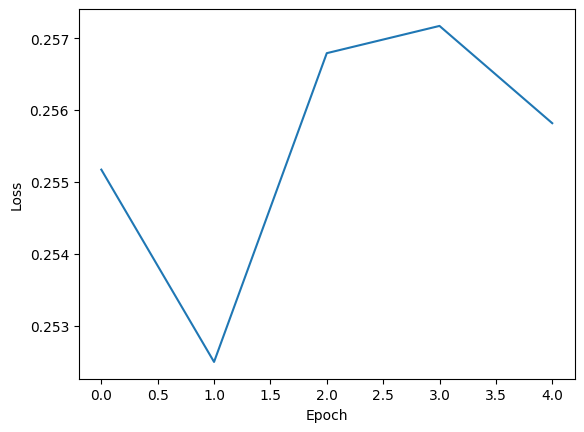

In [70]:
plt.plot(loss_list)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [ ]:
accuracy(X_test, Y_test, theta)

/tmp/ipykernel_1207/2434704148.py:4: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.cnot()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use QuantumCircuit.cx as direct replacement.
  qc.cnot(i, i+1)
/tmp/ipykernel_1207/2434704148.py:5: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.cnot()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use QuantumCircuit.cx as direct replacement.
  qc.cnot(N-1, 0)
